## Observations and Insights 

In [ ]:
%matplotlib notebook

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Create a copy of the data frame
merge_df_copy = merge_df.copy()

In [122]:
# Checking the number of mice.
len(merge_df_copy["Mouse ID"].value_counts())

248

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merge_df_copy[merge_df_copy.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
merge_df_copy.loc[merge_df_copy["Mouse ID"]== "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merge_df_copy = merge_df_copy.drop(merge_df.loc[merge_df["Mouse ID"]== "g989"].index)

In [7]:
# Checking the number of mice in the clean DataFrame.

len(merge_df_copy["Mouse ID"].value_counts())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [89]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Filter the DataFrame down only on to those columsn to chart
drug_groups = merge_df_copy.groupby("Drug Regimen")

In [90]:
# Create a variable to store the total number of unique mice tested on each drug regimen 
mousetotal_drug = drug_groups["Mouse ID"].count().sort_values(ascending=False)

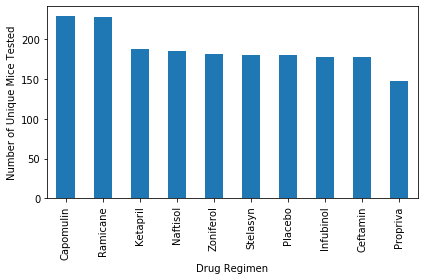

In [91]:
# Create the chart and customize it
drug_chart = mousetotal_drug.plot(kind = "bar")
plt.ylabel("Number of Unique Mice Tested")
plt.tight_layout()

In [116]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Create a range based on the number of drugs
x_axis = np.arange(len(merge_df_copy["Drug Regimen"].unique()))
tick_locations = [value for value in x_axis]

# Pull the drug names
drug_name= mousetotal_drug.index

Text(0.5, 0, 'Drug Regimen')

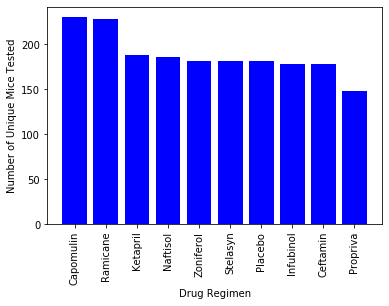

In [117]:
# Create the chart
plt.bar(x_axis, mousetotal_drug, color='b', align="center")
plt.xticks(tick_locations, drug_name, rotation="vertical" )
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group the df by "Sex"
gender_group = merge_df_copy.groupby("Sex")

In [98]:
# Obtain the total items for each gender
gender_distribution = gender_group["Sex"].count().sort_values(ascending=False)

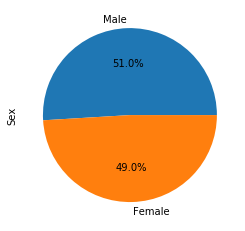

In [99]:
# Create the gender pie
gender_pie = gender_distribution.plot(kind="pie", autopct='%1.1f%%')

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create the labels
labels = gender_distribution.index

Text(0, 0.5, 'Sex')

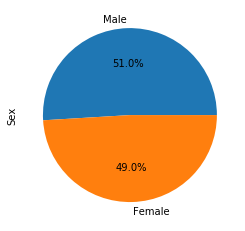

In [113]:
# Create the chart
plt.pie(gender_distribution, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [164]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

l509_records = merge_df_copy.loc[(merge_df_copy["Mouse ID"]== "l509") & (merge_df_copy["Drug Regimen"]== "Capomulin")]
l509_records

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


In [167]:
l509_timepoint = l509_records[["Timepoint", "Tumor Volume (mm3)"]]
l509_timepoint = l509_timepoint.set_index("Timepoint")

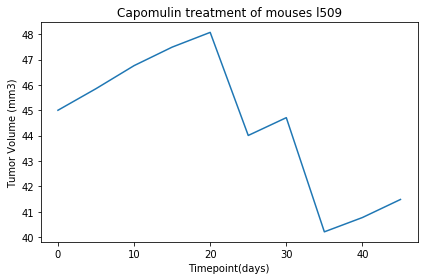

In [168]:
l509_chart = l509_timepoint.plot(kind="line", title = "Capomulin treatment of mouses l509", legend=False)
l509_chart.set_ylabel("Tumor Volume (mm3)")
l509_chart.set_xlabel("Timepoint(days)")
plt.tight_layout()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
